In [1]:
import json
import pandas as pd

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    # windows에서 실행하는 경우 기본 인코딩이 cp949 이므로 encoding 값 지정해야 함.
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [6]:
%cd

/Users/dahlmoon


In [7]:
# 비즈니스 데이터 로드
biz_df = load_json_df('./Documents/data/yelp_dataset/business.json')
biz_df.shape

(192609, 14)

In [8]:
biz_df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [9]:
# 리뷰 카운트 최대값
biz_df['review_count'].max()

8348

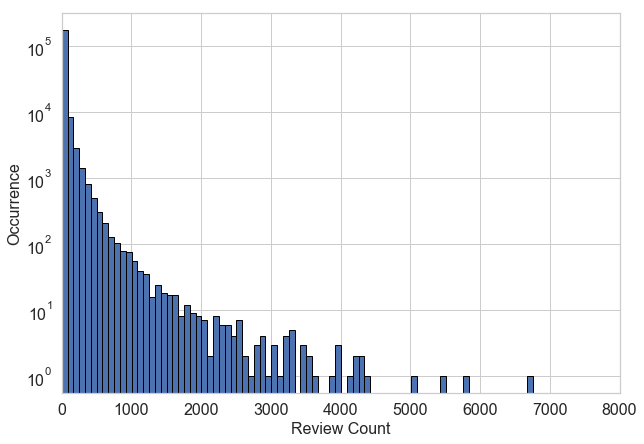

In [12]:
# 그림 2-4
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black')
ax.set_yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,8000])
_ = ax.set_xlabel('Review Count', fontsize=16)
_ = ax.set_ylabel('Occurrence', fontsize=16)